In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [3]:
emset=pd.read_csv("spam.csv")

In [4]:
emset.sample(5)

,Category,Message
3910,ham,Serious? What like proper tongued her
618,ham,For my family happiness..
1319,ham,Ok...
433,spam,Congrats! Nokia 3650 video camera phone is you...
440,ham,But i have to. I like to have love and arrange.


In [5]:
emset.shape

(5572, 2)

 1. Data Cleaning
 2. EDA
 3. Text Preprocessing
 4. Model Building
 5. Evaluation
 6. Improvement
 7. Website
 8. Deploy

# Data Cleaning

In [6]:
emset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
emset.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
emset.duplicated().sum()

np.int64(415)

In [9]:
emset_1=emset.drop_duplicates(keep='first')

In [10]:
emset_1.duplicated().sum()

np.int64(0)

In [11]:
emset_1.loc[:,'Category']=encoder.fit_transform(emset_1['Category'])

In [12]:
emset_1.sample(5)

,Category,Message
4319,0,S...i will take mokka players only:)
1331,0,"Aight no rush, I'll ask jay"
125,0,Ü predict wat time ü'll finish buying?
5097,0,Sorry about that this is my mates phone and i ...
755,0,Realy sorry-i don't recognise this number and ...


# EDA

In [13]:
import matplotlib.pyplot as plt

In [ ]:
import nltk

nltk.download('punkt_tab')

In [15]:
emset_1['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

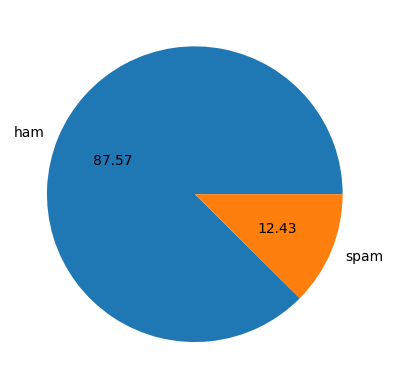

In [16]:
plt.pie(emset_1['Category'].value_counts(),labels=('ham','spam'),autopct= "%0.2f")
plt.show

In [17]:
emset_1 = emset_1.copy()

In [18]:
emset_1['num_character']=emset_1['Message'].apply(len)

In [19]:
emset_1.sample(5)

,Category,Message,num_character
3577,0,The sign of maturity is not when we start sayi...,154
4113,0,"I'll see, but prolly yeah",25
4179,0,Two teams waiting for some players,34
4709,0,"Did you say bold, then torch later. Or one tor...",59
4026,0,&lt;#&gt; in mca. But not conform.,35


In [20]:
emset_1['num_word']=emset_1['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
emset_1['num_sent']=emset_1['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

emset_1.head(5)

,Category,Message,num_character,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
emset_1[['num_character','num_word','num_sent']].describe()

,num_character,num_word,num_sent
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#ham
emset_1[emset_1['Category']==0][['num_character','num_word','num_sent']].describe()

,num_character,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
emset_1[emset_1['Category']==1][['num_character','num_word','num_sent']].describe()

,num_character,num_word,num_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [24]:
import seaborn as sns

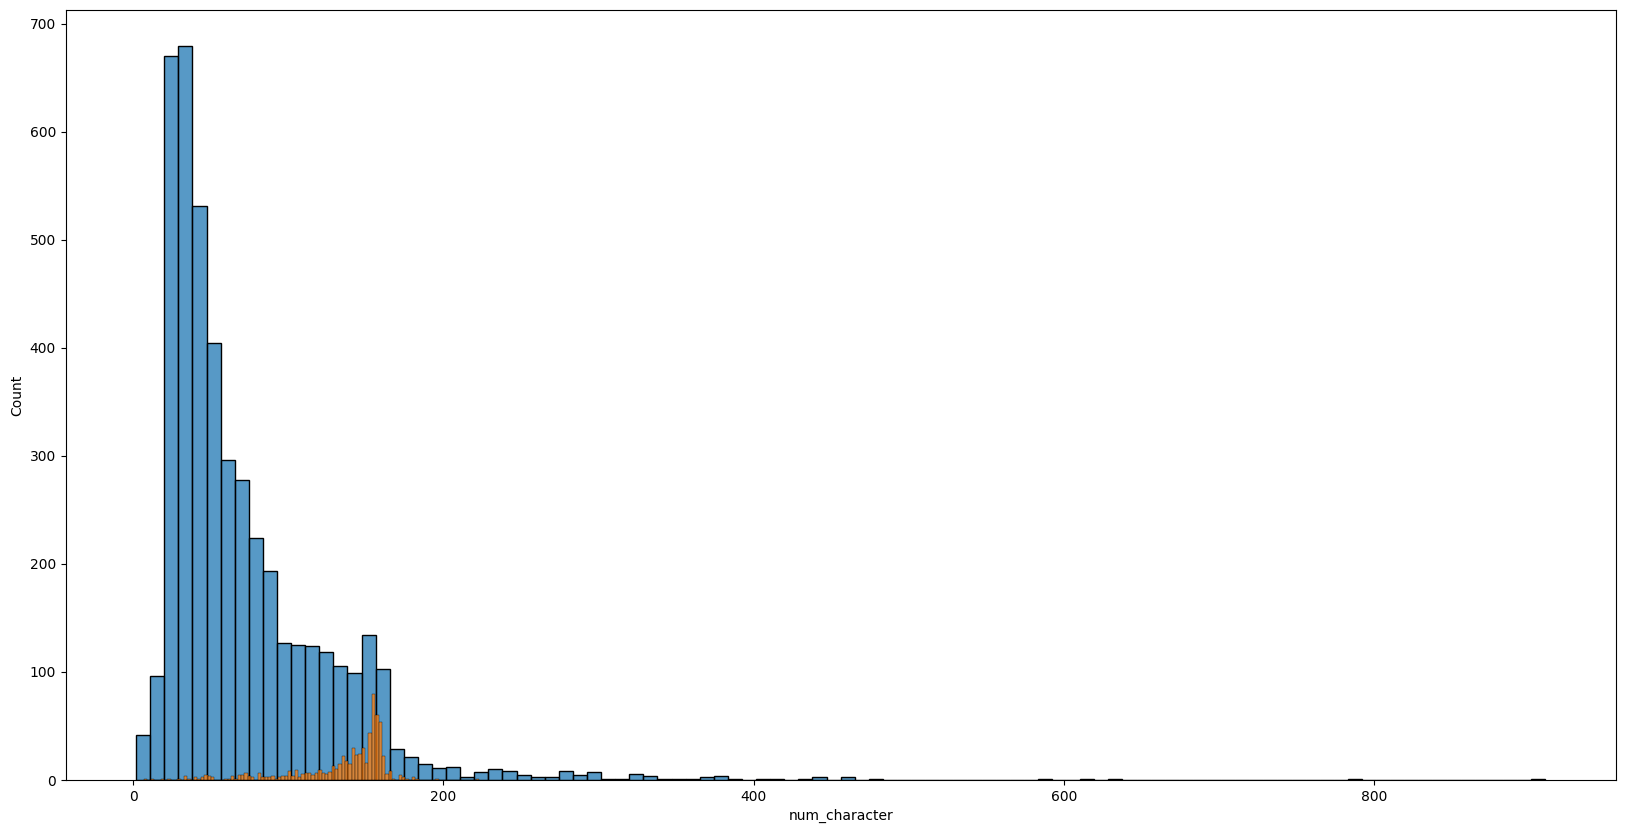

In [25]:
plt.figure(figsize=(20,10))
sns.histplot(emset_1[emset_1['Category']==0]['num_character'],bins=100)
sns.histplot(emset_1[emset_1['Category']==1]['num_character'],bins=100)
#plt.xlabel('Value')
#plt.ylabel('Frequency')
plt.show()

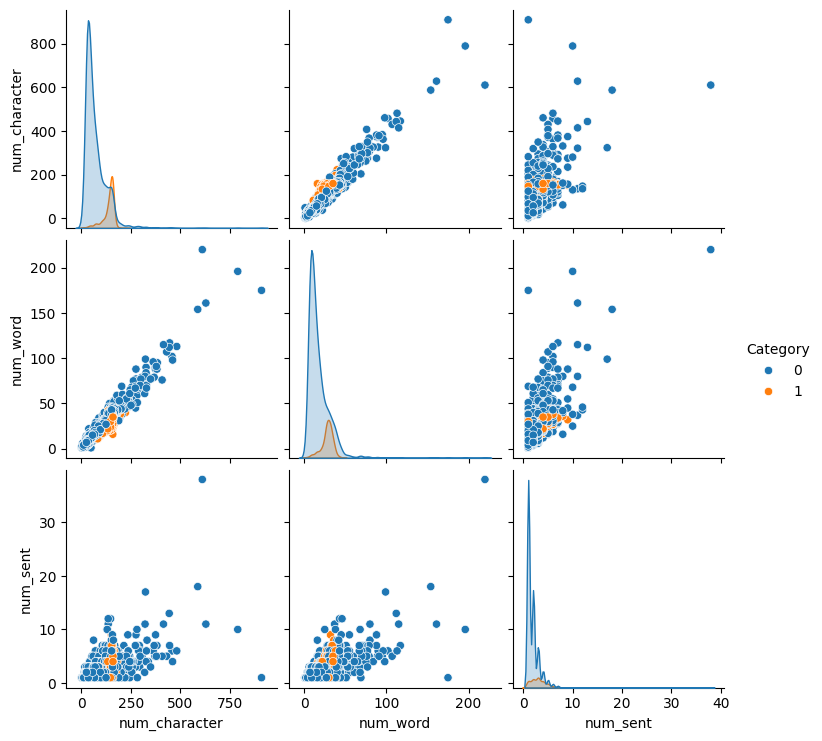

In [26]:
sns.pairplot(emset_1,hue='Category')

# Data Preprocessing

* Lower Case
* Tokenization
* Removing Special Characters
* Removing Stop Words and punctations
* Stemming

In [ ]:
from app.preprocess import transform_text

In [30]:
transform_text("Hii my name is Vrishank Malviya and i live in 54 %#$# in Salokar after washing" )

['hii', 'name', 'vrishank', 'malviya', 'live', '54', 'salokar', 'wash']

In [31]:
emset_1['transform_text']=emset_1['Message'].apply(transform_text)

In [32]:
from wordcloud import WordCloud

wc=WordCloud(width=600,height=600,min_font_size=10,background_color="White")

In [33]:
emset_1['transform_text_str'] = emset_1['transform_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

In [34]:
spam_cloud=wc.generate(emset_1[emset_1['Category']==1]['transform_text_str'].str.cat(sep=" "))

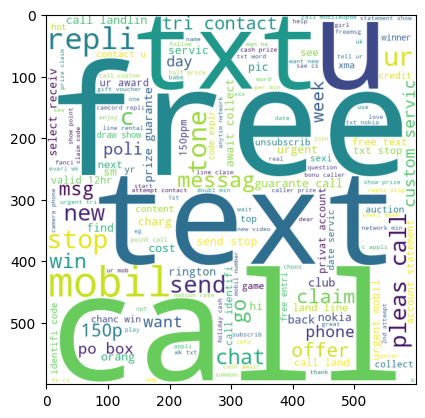

In [35]:
plt.imshow(spam_cloud)

In [36]:
ham_cloud=wc.generate(emset_1[emset_1['Category']==0]['transform_text_str'].str.cat(sep=" "))

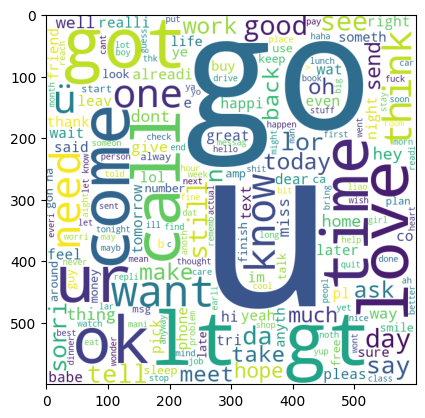

In [37]:
plt.imshow(ham_cloud)

In [38]:
emset_1.head()

,Category,Message,num_character,num_word,num_sent,transform_text,transform_text_str
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]",nah think goe usf live around though


In [39]:
scor=[]
for msg in emset_1[emset_1['Category']==1]['transform_text'].tolist():
    for word in msg:
        scor.append(word)

In [40]:
len(scor)

9781

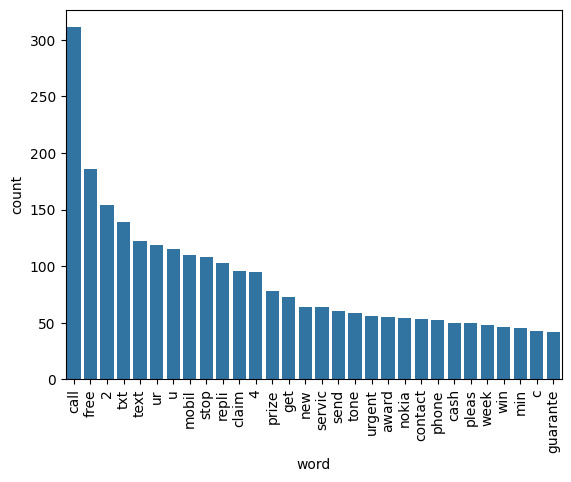

In [41]:
from collections import Counter
count=pd.DataFrame(Counter(scor).most_common(30),columns=['word','count'])

sns.barplot(x="word",y="count",data=count,)
plt.xticks(rotation=90)
plt.show()


In [42]:
scorh=[]
for msg in emset_1[emset_1['Category']==0]['transform_text'].tolist():
    for word in msg:
        scorh.append(word)

In [43]:
len(scorh)

35940

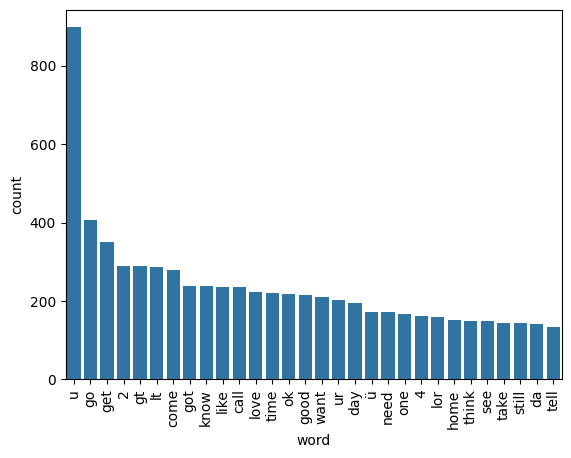

In [44]:
from collections import Counter
count=pd.DataFrame(Counter(scorh).most_common(30),columns=['word','count'])

sns.barplot(x="word",y="count",data=count,)
plt.xticks(rotation=90)
plt.show()


# Model Building 

Naive bayes Classifier will be used as it is best performed algorithm in textual data

In [45]:
emset_1.head(1)

,Category,Message,num_character,num_word,num_sent,transform_text,transform_text_str
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...


# * Using CounterVectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [47]:
X = cv.fit_transform(emset_1['transform_text_str']).toarray()


In [48]:
X.shape

(5157, 6781)

In [49]:
y=emset_1['Category'].values

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=object)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [54]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [55]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [56]:
gnb.fit(X_train,y_train)
pred=gnb.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.8691860465116279
[[786 119]
 [ 16 111]]
0.4826086956521739


In [57]:
mnb.fit(X_train,y_train)
pred1=mnb.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.9796511627906976
[[895  10]
 [ 11 116]]
0.9206349206349206


In [58]:
bnb.fit(X_train,y_train)
pred3=bnb.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


# * Using TFidfVectorizer

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfi=TfidfVectorizer(max_features=3000)

In [60]:
X=tfi.fit_transform(emset_1['transform_text_str']).toarray()

In [61]:
X.shape

(5157, 3000)

In [62]:
y=emset_1['Category'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [67]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [68]:
gnb.fit(X_train,y_train)
pred=gnb.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.8682170542635659
[[786 119]
 [ 17 110]]
0.48034934497816595


In [69]:
mnb.fit(X_train,y_train)
pred1=mnb.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.9718992248062015
[[905   0]
 [ 29  98]]
1.0


In [70]:
bnb.fit(X_train,y_train)
pred3=bnb.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


# Improving Model Performance 

* Change the max features parameter of TfIdf

In [ ]:
import pickle
pickle.dump(tfi,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
